## Credit Card Fraud Detection

In [1]:
import pycaret

In [33]:
# inbuilt data set from pycaret
from pycaret.datasets import get_data
#import pandas as pd
#pd.set_option('display.max_columns',None)
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
dataset.shape

(24000, 24)

In [4]:
dataset.columns[23]

'default'

# Exploratory data analysis

In [6]:
# null values 
null=[n for n in dataset.columns if dataset[n].isnull().sum()>1]
null

[]

In [8]:
# numeric values
numeric=[num for num in dataset.columns if dataset[num].dtype!='O']
print(numeric)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']


In [16]:
l1=list(dataset.default)
print(l1.count(0))
print(l1.count(1))

18694
5306


['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']


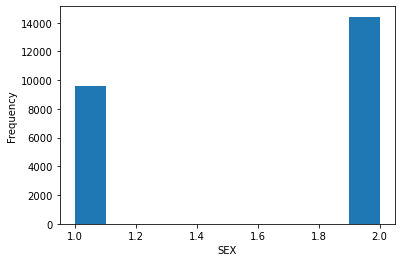

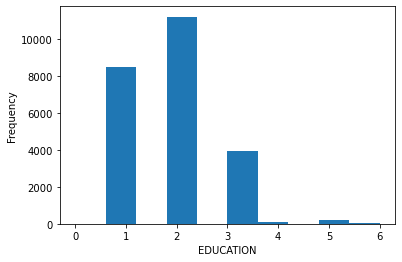

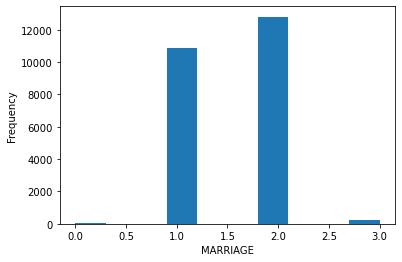

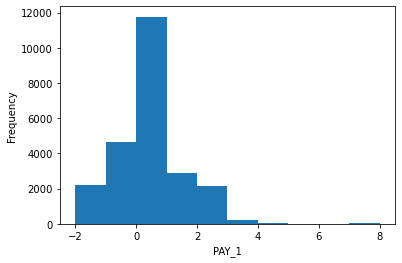

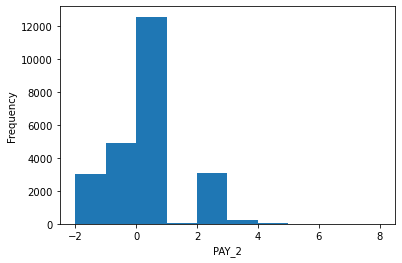

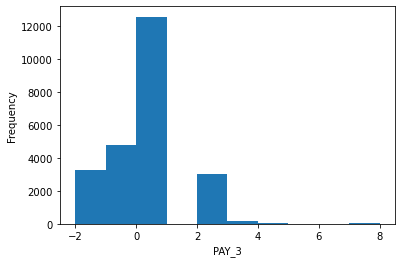

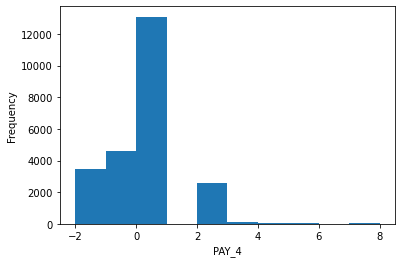

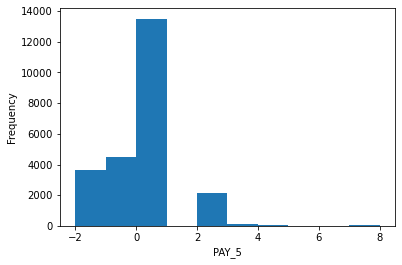

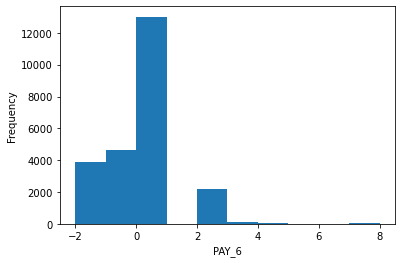

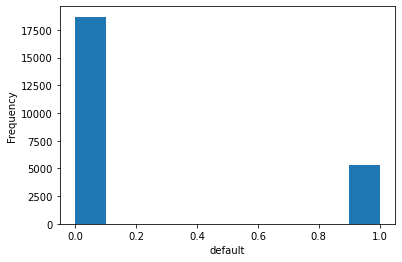

In [23]:
#distribution of discrete features
import matplotlib.pyplot as plt
%matplotlib inline
discrete=[d for d in dataset.columns if len(dataset[d].unique())<26]
print(discrete)
for i in discrete:
    dataset[i].plot.hist()
    plt.xlabel(i)
    plt.show()

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


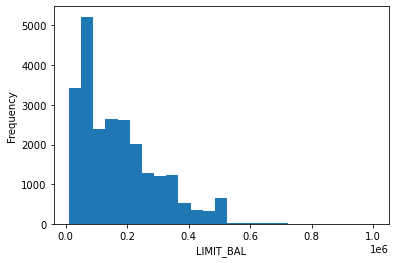

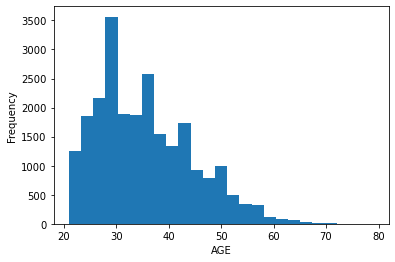

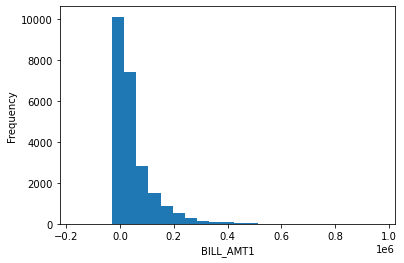

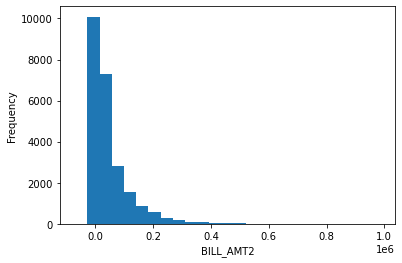

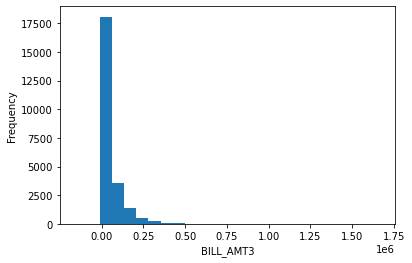

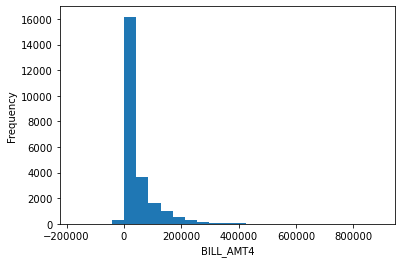

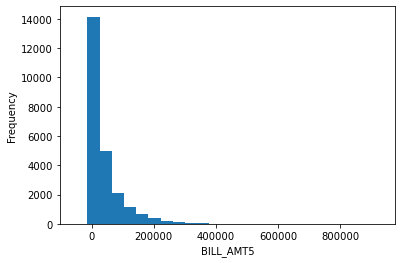

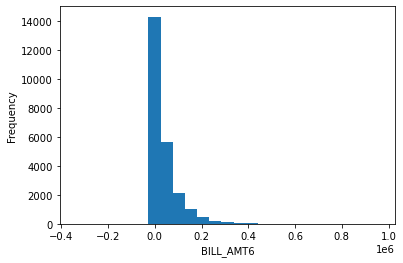

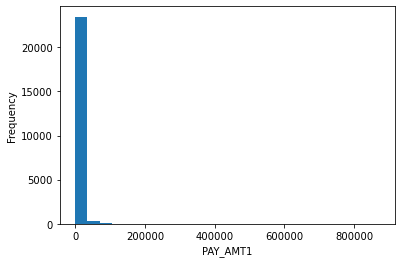

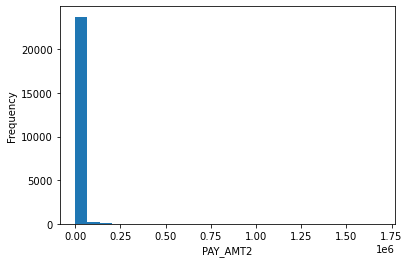

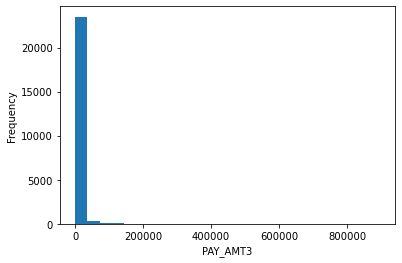

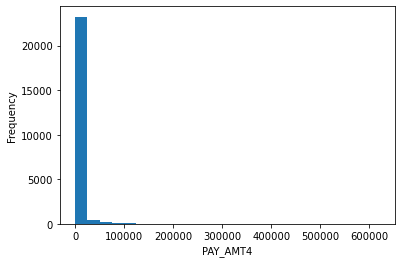

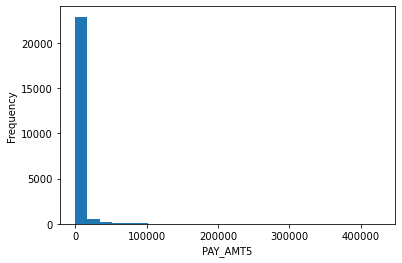

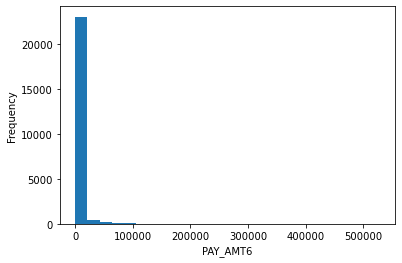

In [29]:
# distribution of contineous features
contineous=[c for c in dataset.columns if c not in discrete]
print(contineous)
for i in contineous:
    dataset[i].plot.hist(bins=25)
    plt.xlabel(i)
    plt.show()

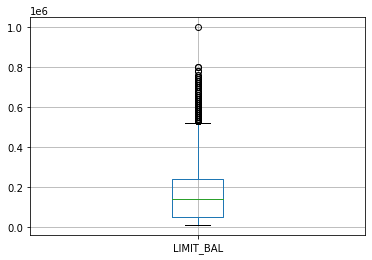

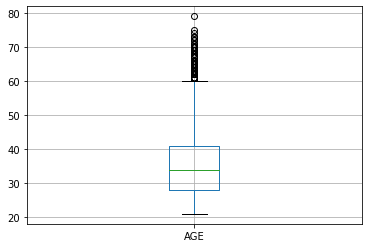

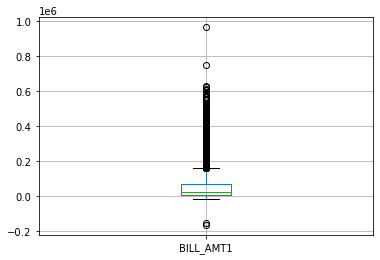

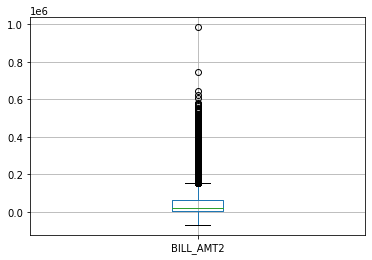

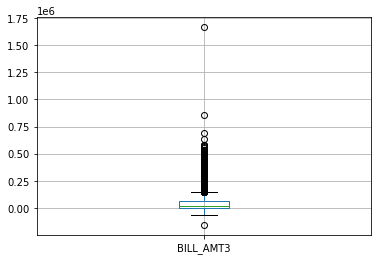

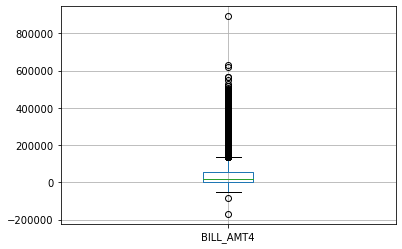

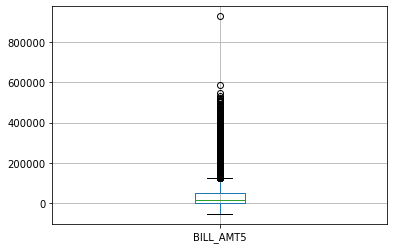

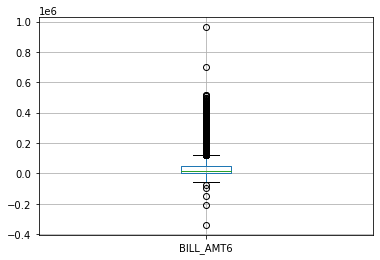

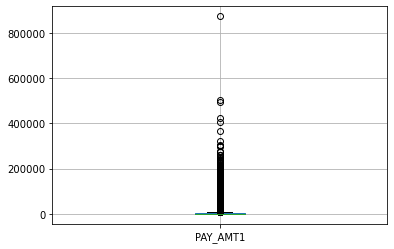

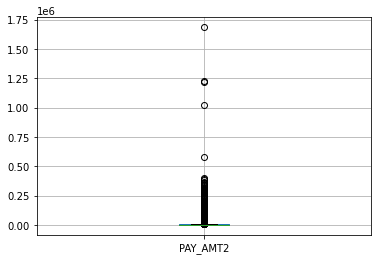

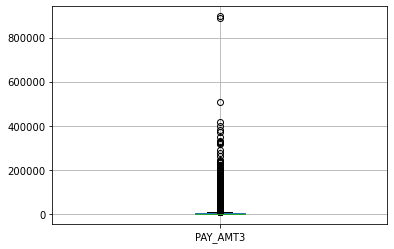

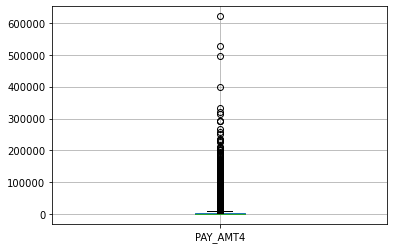

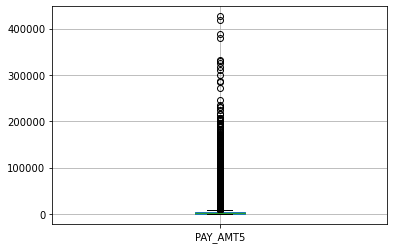

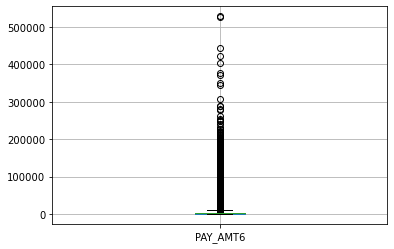

In [34]:
#outliers
for i in contineous:
    dataset.boxplot(i)
    plt.show()

In [35]:
# categorical features
categorical=[c for c in dataset.columns if dataset[c].dtype=='O']
print(categorical)

[]


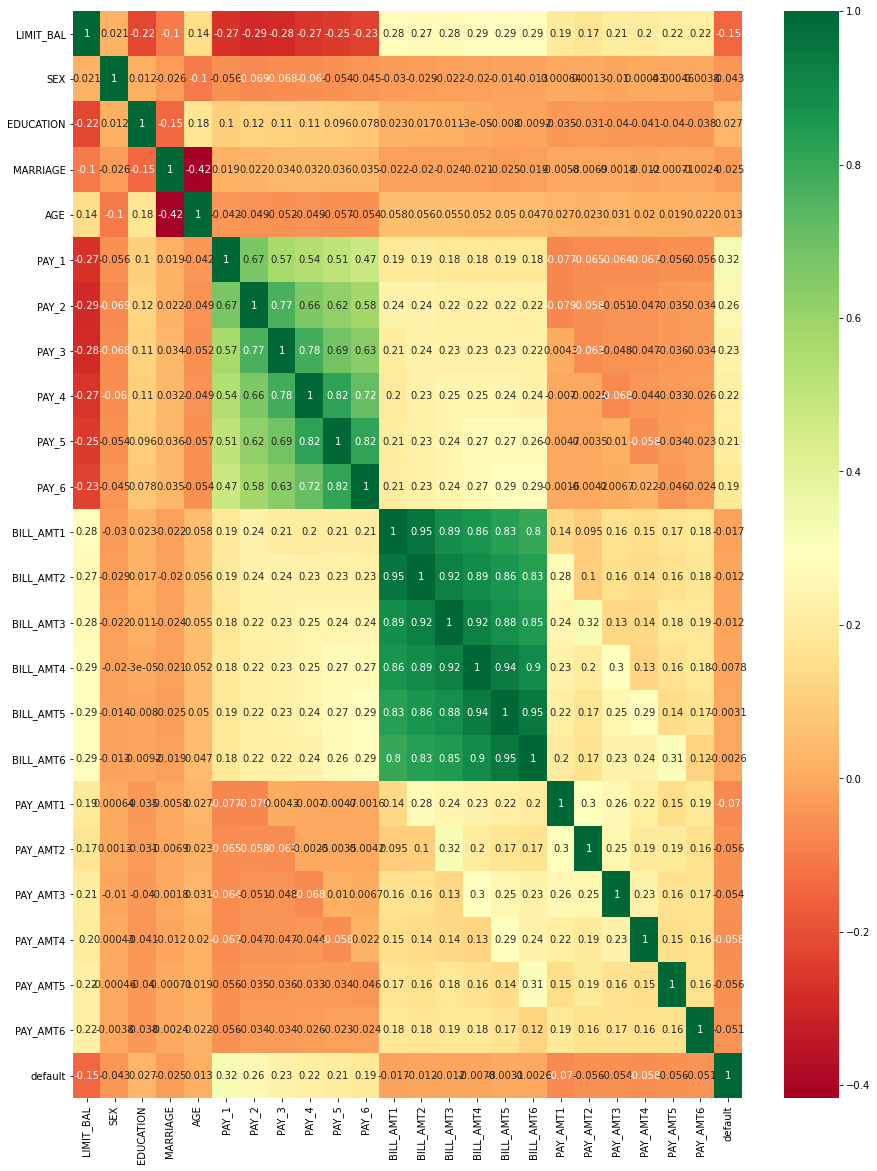

In [39]:
# correlation between features
import seaborn as sns
corelations=dataset.corr()
cols=corelations.index
plt.figure(figsize=(15,20))
g=sns.heatmap(dataset[cols].corr(),annot=True,cmap='RdYlGn')

In [40]:
x=dataset.iloc[:,0:23]
y=dataset.iloc[:,23]

In [41]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0


In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [10]:
scaled_x=sc.fit_transform(x)

In [11]:
scaled_x

array([[-1.13834487,  0.81493819,  0.1892966 , ..., -0.30909781,
        -0.31005791, -0.2899404 ],
       [-0.5994885 ,  0.81493819,  0.1892966 , ..., -0.24425398,
        -0.24512243, -0.01542366],
       [-0.90740643,  0.81493819,  0.1892966 , ..., -0.23776959,
        -0.24064189, -0.23503705],
       ...,
       [-1.06136539, -1.22708693,  0.1892966 , ..., -0.03675371,
        -0.18018696, -0.11974002],
       [-0.67646799, -1.22708693,  1.45938844, ..., -0.18420859,
         3.12918447, -0.19089476],
       [-0.90740643, -1.22708693,  0.1892966 , ..., -0.24425398,
        -0.24512243, -0.23503705]])

In [12]:
import pandas as pd
df_x=pd.DataFrame(scaled_x,columns=x.columns)

In [13]:
df_x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.138345,0.814938,0.189297,-1.060769,-1.246829,1.800948,1.792426,-0.692424,-0.664385,-1.52945,...,-0.666382,-0.673786,-0.665576,-0.653463,-0.334348,-0.216221,-0.291722,-0.309098,-0.310058,-0.289940
1,-0.599489,0.814938,0.189297,0.857439,-0.157582,0.021245,0.117653,0.141822,0.189032,0.23547,...,-0.480705,-0.450124,-0.418028,-0.391068,-0.245110,-0.182753,-0.235914,-0.244254,-0.245122,-0.015424
2,-0.907406,0.814938,0.189297,-1.060769,0.169192,0.021245,0.117653,0.141822,0.189032,0.23547,...,0.034805,-0.231894,-0.185997,-0.154847,-0.216775,-0.161335,-0.224752,-0.237770,-0.240642,-0.235037
3,-0.907406,-1.227087,0.189297,-1.060769,2.347686,-0.868606,0.117653,-0.692424,0.189032,0.23547,...,-0.159326,-0.346979,-0.348506,-0.330621,-0.216775,1.269099,0.266357,0.274497,-0.265317,-0.252661
4,-0.907406,-1.227087,-1.080795,0.857439,0.169192,0.021245,0.117653,0.141822,0.189032,0.23547,...,0.154796,-0.371107,-0.340673,-0.315551,-0.187382,-0.169754,-0.255056,-0.244254,-0.245122,-0.246018


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.4,random_state=0)

In [15]:
y_test

5118     1
10284    0
6208     0
3361     0
7068     0
        ..
7683     0
18744    0
11854    0
3714     0
5862     0
Name: default, Length: 9600, dtype: int64

### Decision Tree

In [16]:
from sklearn import tree
l1=tree.DecisionTreeClassifier()

In [17]:
l1.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
pred1=l1.predict(x_test)

In [19]:
pred1

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [20]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [21]:
acc_dt1=accuracy_score(y_test,pred1)

In [22]:
acc_dt1 # compare this with pycaret binary classification decision tree , its same woww

0.7209375

In [23]:
from sklearn.model_selection import cross_val_score
sc=cross_val_score(l1,df_x,y,cv=7)
sc

array([0.71449402, 0.70399533, 0.71449402, 0.72528434, 0.7365811 ,
       0.73541424, 0.72812135])

In [24]:
sc.mean()

0.7226263432356836

In [31]:
len(y)

24000

In [37]:
from sklearn.model_selection import StratifiedKFold
accu=[]

In [38]:
skf=StratifiedKFold(n_splits=10,random_state=None)

In [58]:
print(skf.get_n_splits(df_x,y))

10


In [59]:
print(skf.split(df_x,y))

<generator object _BaseKFold.split at 0x00000161EE365AC8>


In [60]:
#skf.get_n_splits(df_x,y)
for train_index,test_index in skf.split(df_x,y):
    print('Train:',train_index,'Test:',test_index)
    x1_train,x1_test=df_x.iloc[train_index],df_x.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    
    l1.fit(x1_train,y1_train)
    prediction=l1.predict(x1_test)
    print(len(prediction),len(y1_test))
    score=accuracy_score(prediction,y1_test)
    accu.append(score)

Train: [ 2400  2401  2402 ... 23997 23998 23999] Test: [   0    1    2 ... 2397 2398 2399]
2400 2400
Train: [    0     1     2 ... 23997 23998 23999] Test: [2400 2401 2402 ... 4860 4864 4866]
2400 2400
Train: [    0     1     2 ... 23997 23998 23999] Test: [4779 4780 4781 ... 7207 7208 7209]
2400 2400
Train: [    0     1     2 ... 23997 23998 23999] Test: [7175 7184 7185 ... 9628 9629 9630]
2400 2400
Train: [    0     1     2 ... 23997 23998 23999] Test: [ 9506  9508  9509 ... 12052 12055 12056]
2400 2400
Train: [    0     1     2 ... 23997 23998 23999] Test: [11812 11814 11818 ... 14558 14560 14561]
2400 2400
Train: [    0     1     2 ... 23997 23998 23999] Test: [13909 13918 13919 ... 16960 16961 16963]
2400 2400
Train: [    0     1     2 ... 23997 23998 23999] Test: [16352 16358 16360 ... 19262 19263 19264]
2400 2400
Train: [    0     1     2 ... 23997 23998 23999] Test: [18907 18915 18916 ... 21597 21598 21600]
2400 2400
Train: [    0     1     2 ... 21597 21598 21600] Test: [21599

In [61]:
import numpy as np
np.array(accu).mean()

0.7210416666666667

### Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
r1=RandomForestClassifier()

In [42]:
r1.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
pred2=r1.predict(x_test)

In [44]:
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
acc_dt2=accuracy_score(y_test,pred2)

In [51]:
acc_dt2 # this accuracy is little more than that of pycaret

0.8122916666666666

In [ ]:
# we can also check other models.... and compare with pycaret models